In [37]:
import numpy as np
#from scipy.integrate import solve_ivp
#from scipy.signal import spectrogram
import matplotlib.pyplot as plt
#from piaxi_numerics import set_params, solve_system, get_text_params

verbosity = 9              # Output verbosity
use_tex_format = False     # Toggle LaTeX formatting for plot text
output_dir='./test_data/'  # Path to folder where subfolders/data files are saved
plot_all_k_modes = False   # Toggle whether or not we plot every k-mode

# example file: smooth resonance
file_smooth = 'piaxiverse_GMR_L4scan2_SU3_ac8fcc3fa093280e6916ba0d3e17f74a7ab2e8a2'
# example file: narrow resonance
file_narrow = 'piaxiverse_GMR_L4scan2_SU3_d9c1797fc0793cbd2a5bd8af36603fef3f1433a8'
# example file: steep resonance
file_steep  = 'piaxiverse_GMR_L4scan_SU3_211b7a1a8656bedb609b007e1cc8828d3991f3b8'
# example file: no resonance
file_none   = 'piaxiverse_GMR_L4scan_SU3_af2ee65ed6830a0aba14a1a3748f7ccfe47dcb70'

# Select which of the above example files we are importing
input_file = file_narrow

In [38]:
# LaTeX Formatting for Plots
if use_tex_format:
    plt.rcParams.update({
        'text.usetex': True,
        'font.family': 'serif',
    })
    plt.rc('text', usetex=True)
    plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

    SMALL_SIZE = 8
    MEDIUM_SIZE = 16
    BIGGER_SIZE = 20

    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    '''
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the x tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the y tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', labelsize=BIGGER_SIZE, titlesize=BIGGER_SIZE)  # fontsize of the figure title
    '''

In [39]:
## Import File
from piaxi_utils import load_single_result, get_kvals, get_times, n_p, n_k
if True:
    subfolder = '_'.join(input_file.split('_')[:-1])+'/'
    example_params, example_results, _, _ = load_single_result(output_dir+subfolder, input_file)

# Convert amplitudes to occupation numbers
k_values = get_kvals(example_params, None)
times    = get_times(example_params, None)

N_k = example_params['k_num']
N_t = example_params['t_num']
print(f'N_k = {N_k}')
print(f'N_t = {N_t}')

# 2D dimensionality array || dims = [N_k, N_t]
# Each row contains a list of the occupation numbers over each timestep, for a given k-mode
nk_sep = np.array([n_p(k_i, example_params, example_results, k_values, times, n=n_k) for k_i, k_v in enumerate(k_values)])

# 1D array of the total occupation number over each timestep || dims = [N_t]
# Each row contains a list of the occupation number over each timestep, for a given k-mode
nk_tot = np.sum(nk_sep, axis=0)

# 1D array of resonance classification for each k-mode || dims = [N_k]
k_mode_classifications = np.array(example_params['k_class_arr'])

# Dict storing various input parameters (and other outputs, beyond the time-series data given above)
print('F   = %.1e  [eV]' % example_params['F'])
print('m_q = %.1e  [eV]' % example_params['m_u'])
print('L4  = %.1e  [eV]' % example_params['L4'])
print('p_t = %.1e  [eV^4]' % example_params['p_t'])
print('eps = %.1e' % example_params['eps'])
print('---------------------------------------------------')
print(example_params.keys())
print('---------------------------------------------------')

N_k = 991
N_t = 1000
F   = 4.7e+23  [eV]
m_q = 1.2e-07  [eV]
L4  = 3.2e+26  [eV]
p_t = 1.9e+32  [eV^4]
eps = 1.0e+00
---------------------------------------------------
dict_keys(['A_0', 'A_pm', 'A_sens', 'Adot_0', 'F', 'G', 'L3', 'L4', 'N_c', 'N_n', 'N_r', 'T_c', 'T_n', 'T_r', 'T_u', 'Th', 'amps', 'c', 'config_name', 'd', 'dimensionful_p', 'disable_B', 'disable_C', 'disable_D', 'disable_P', 'dqm', 'e', 'eps', 'eps_c', 'h', 'inf_con', 'int_method', 'jupyter', 'k_0', 'k_class_arr', 'k_mean_arr', 'k_num', 'k_peak_arr', 'k_ratio_arr', 'k_sens_arr', 'k_span', 'l1', 'l2', 'l3', 'l4', 'm', 'm_0', 'm_c', 'm_n', 'm_q', 'm_r', 'm_u', 'mem_per_core', 'mu_Th', 'mu_d', 'num_cores', 'p', 'p_0', 'p_c', 'p_n', 'p_r', 'p_t', 'parallel', 'qc', 'qm', 'res_band', 'res_band_class', 'res_class', 'res_con', 'res_freq', 'res_freq_class', 'res_freq_label', 'res_ratio_f', 'res_ratio_m', 'rescale_amps', 'rescale_consts', 'rescale_k', 'rescale_m', 'seed', 'sig_Th', 'sig_d', 't_num', 't_res', 't_sens', 't_span', 

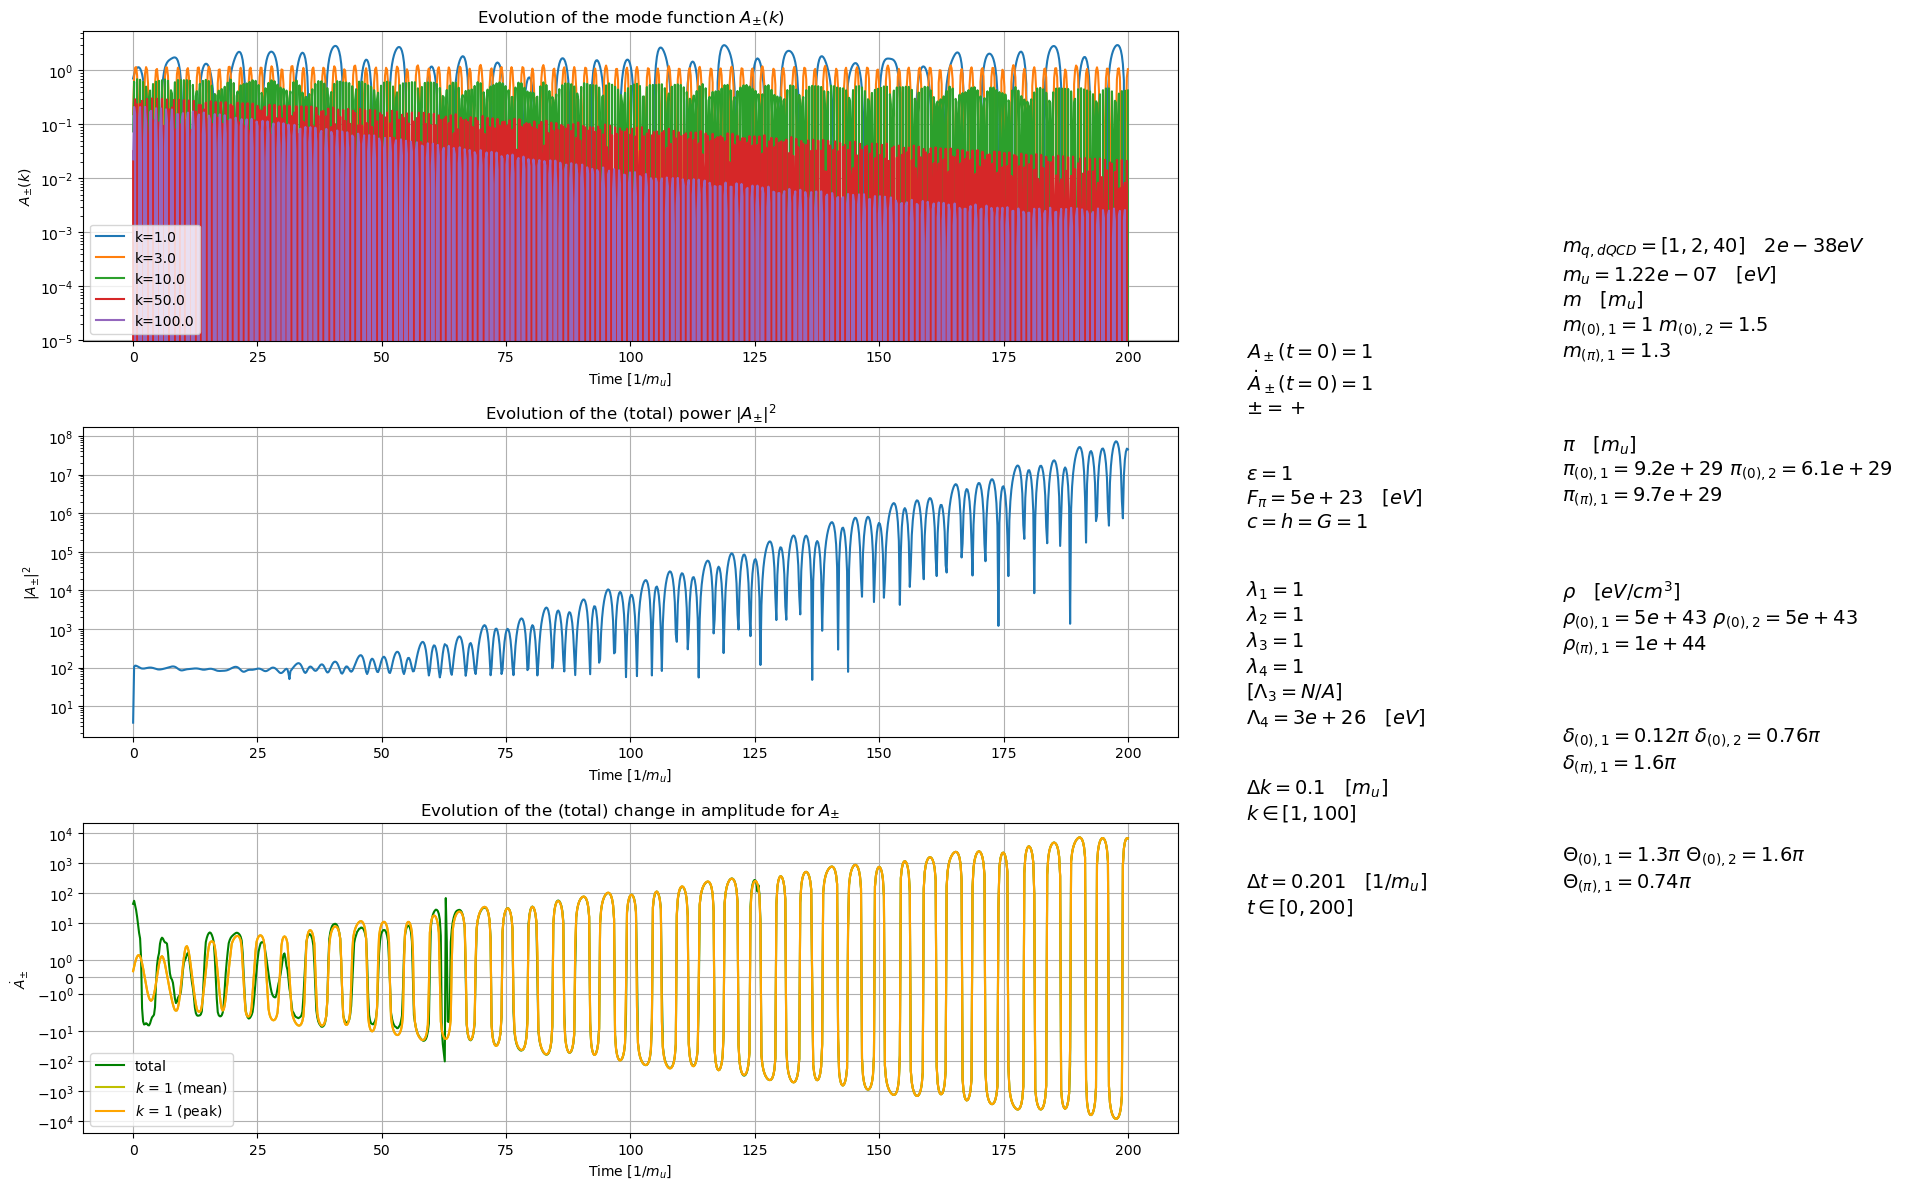

fit = a: 0.03   b: 0.99   c: 0.03
pcov = 
 [[ 0.00135894  0.         -0.00134535]
 [ 0.          0.          0.        ]
 [-0.00134535  0.          0.00135894]]
log-mean-squared error: 3.73
tot_class: resonance
ratio_f: 2.79e+02
ratio_m: 4.46e+02
t_res: 200.000
t_max: 198.999
n_res: 83293757.12761083
n_max: 133008168.80766597
res  | t: 200.00    n = 8.33e+07
max  | t: 199.00    n = 1.33e+08
res condition: 1000000.0
class =  resonance => resonance


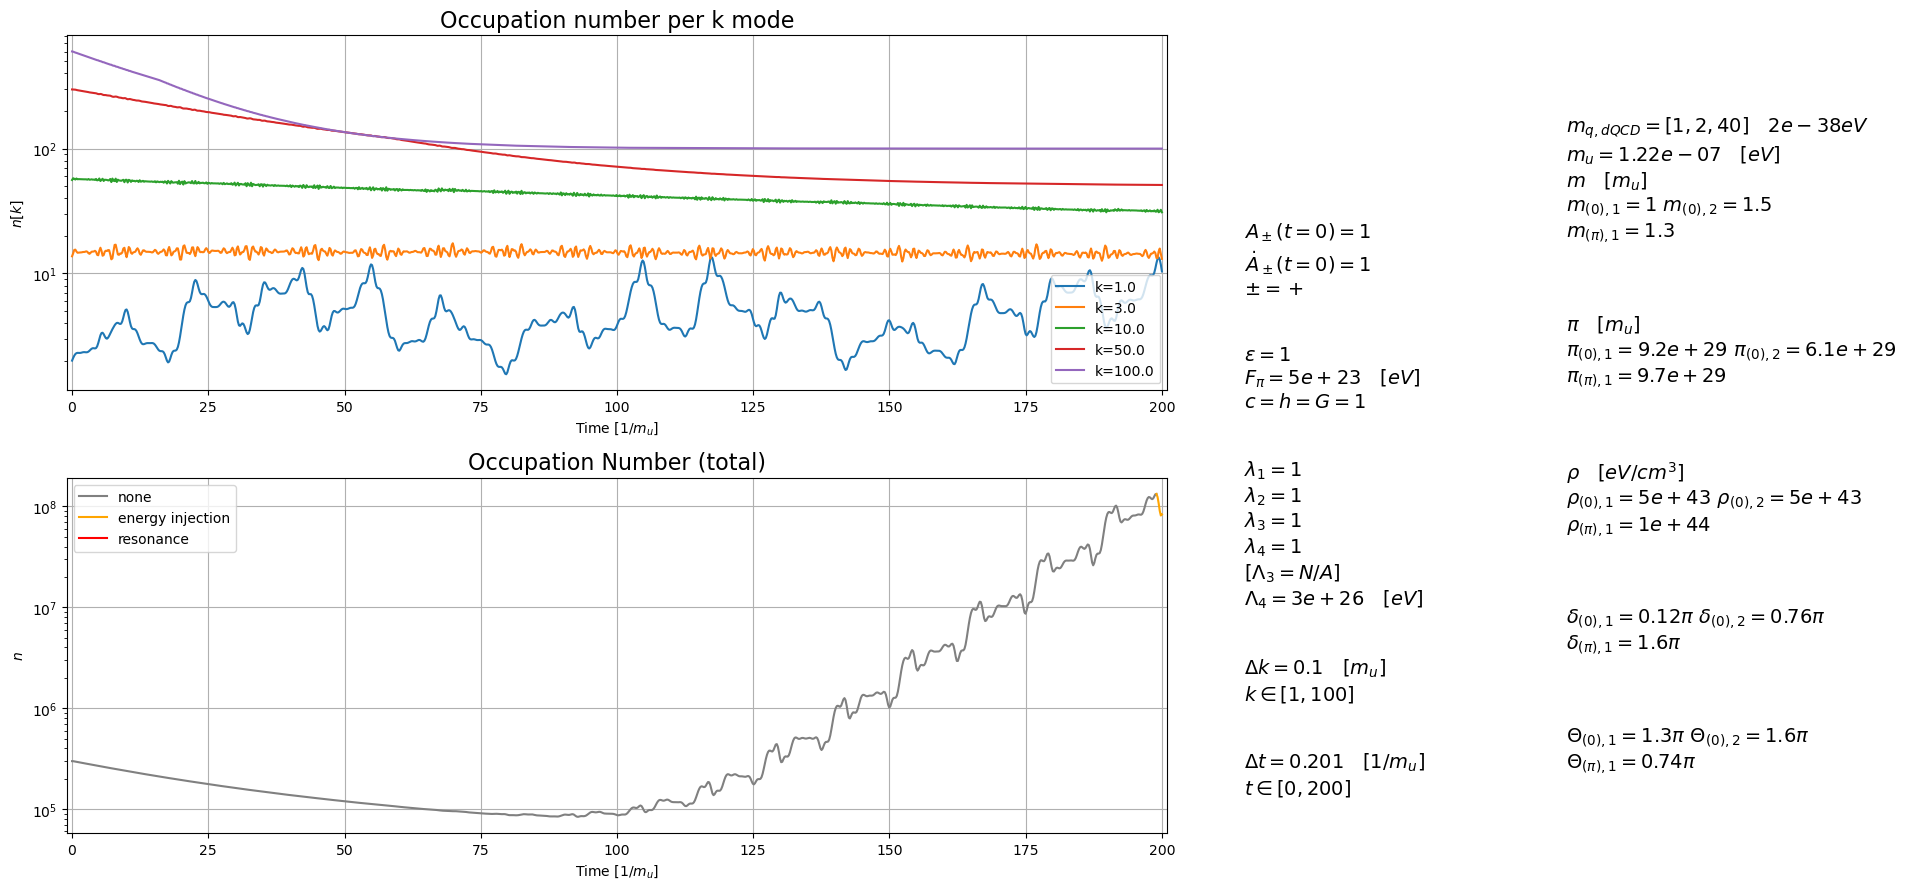

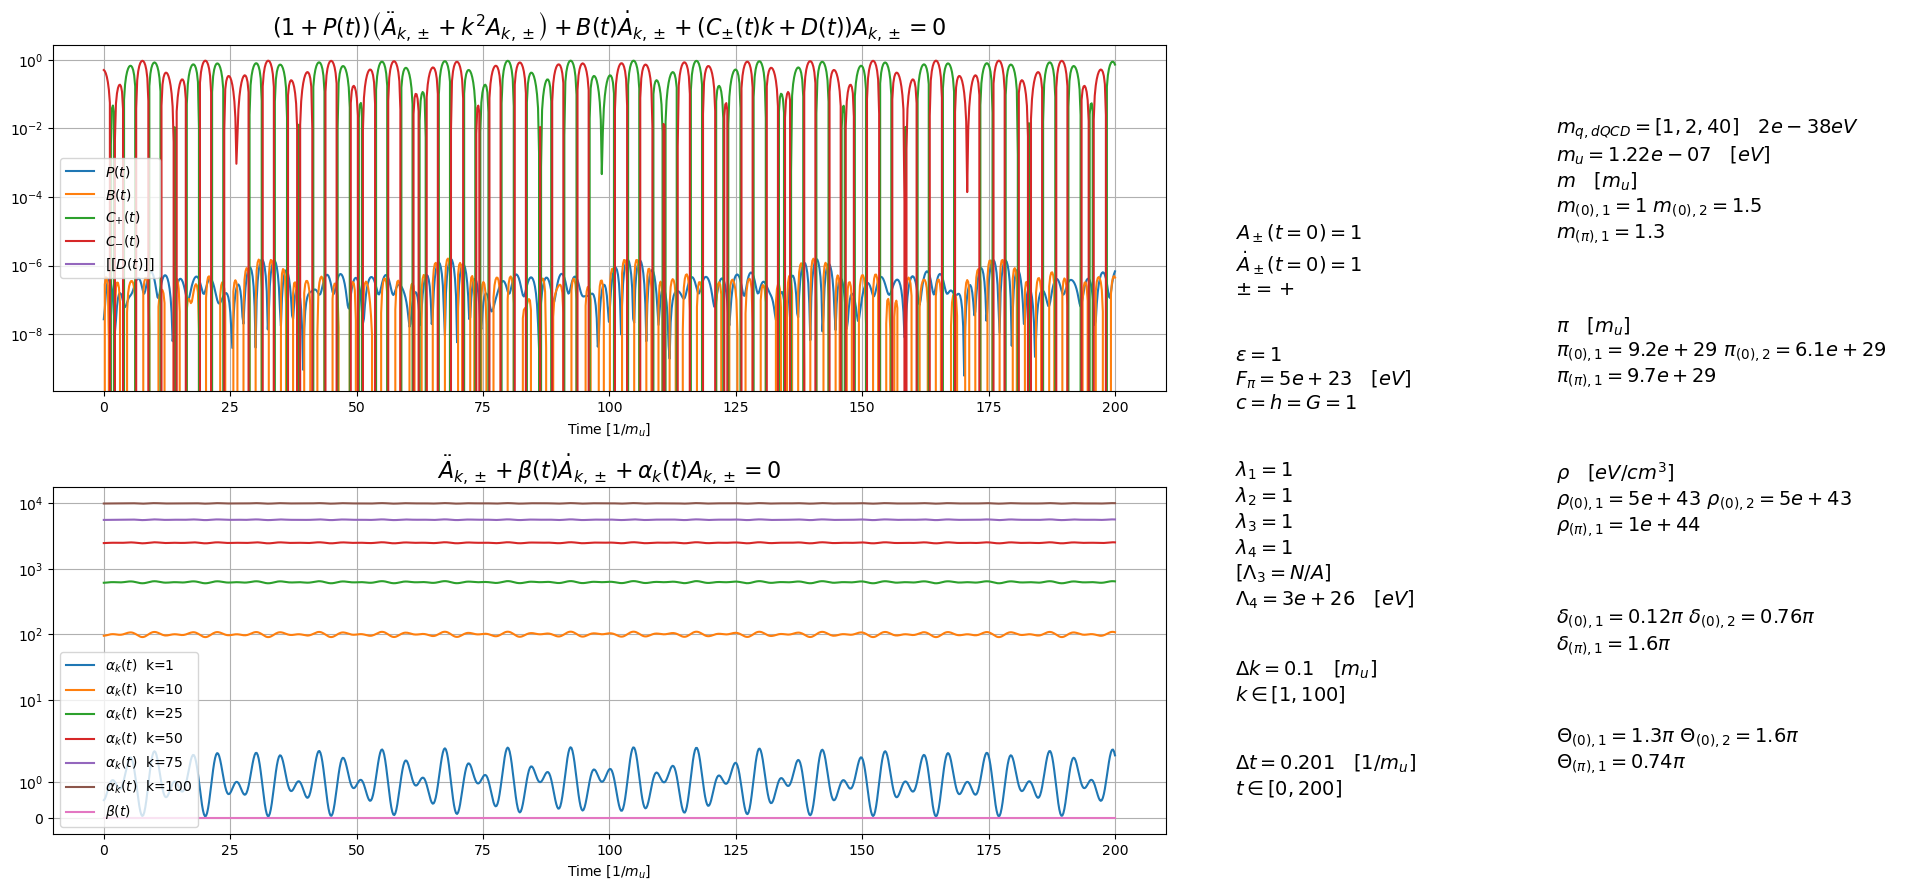

fit = a: 0.03   b: 0.99   c: 0.03
pcov = 
 [[ 0.00135894  0.         -0.00134535]
 [ 0.          0.          0.        ]
 [-0.00134535  0.          0.00135894]]
log-mean-squared error: 3.73


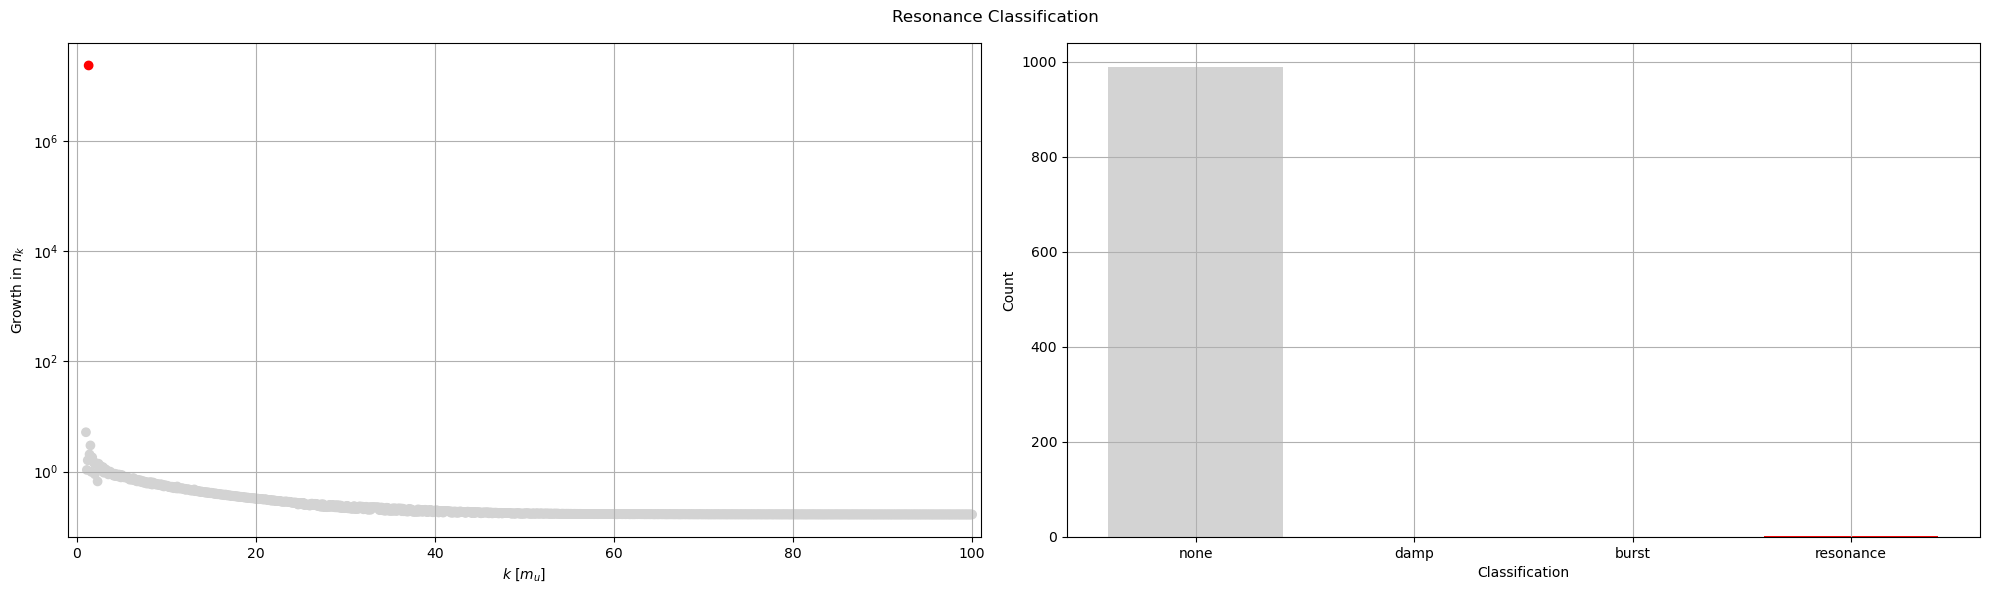

In [40]:
## Generate Plots
if True:
    from piaxi_utils import plot_single_case
    
    #plot_single_case(input_file, output_dir='./scratch/', version='v3.2.7', tex_fmt=use_tex_format)
    if plot_all_k_modes:
        plot_single_case(input_file, output_dir=output_dir, version='', tex_fmt=use_tex_format, add_colorbars=True, k_samples_in=[-1])
    else:
        plot_single_case(input_file, output_dir=output_dir, version='', tex_fmt=use_tex_format)